<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 1.3 Linear Regression

#1.3.1 QR Decomposition:

A process that transforms a matrix A into the product of an orthogonal matrix Q and a triangular matrix R (A = QR). This is useful with creating a line of best fit through data points (known as the "least squares problem").

In [125]:
#example of QR Decomposition
#The first step in QR decomposition is to find an orthogonal basis via the Gram-Schmidt process. The code below is taken from HW 1.2 where the Gram-Schmidt process was defined.
import numpy as np
import sympy as sp

#Linearly independent vector space:
a1 = np.array([3,1,1])
a2 = np.array([-1,2,1])
a3 = np.array([-1/2, -2, 7/2])
M = np.matrix([a1,a2,a3])
M = M.T
print("matrix of vector space:")
print(M)

#defining helper methods
def proj(b,a): #computes the projection of a vector b onto another vector a
  adotb = np.dot(a,b)
  adota = np.dot(a,a)

  return (adotb/adota)*a

def mag(a): #computes the magnitude of vector a
  result = 0
  for i in range(len(a)):
    result = result + pow(a[i],2)

  return pow(result,1/2)

def gram(a,b,c): #computes the gram-schmidt process on linearly indpendent vectors a, b, and c
  #finding the orthogonal components
  u1 = a
  u2 = b - proj(b,u1)
  u3 = c - proj(c,u1) - proj(c,u2)
  #normalizing the matrix
  e1 = (u1/mag(u1))
  e2 = (u2/mag(u2))
  e3 = (u3/mag(u3))
  M = np.array([e1, e2, e3])
  return M.T

print("Orthogonal basis matrix")
orth_Basis = gram(a1,a2,a3)
print(orth_Basis)
#end of reused code

matrix of vector space:
[[ 3.  -1.  -0.5]
 [ 1.   2.  -2. ]
 [ 1.   1.   3.5]]
Orthogonal basis matrix
[[ 0.90453403 -0.40824829 -0.12309149]
 [ 0.30151134  0.81649658 -0.49236596]
 [ 0.30151134  0.40824829  0.86164044]]


In this example, matrix A is represented by the matrix of the vector space and matrix Q is represented by the orthogonal basis of A. In order to find what matrix R is equal to we must simplify the equation:

A = QR

$Q^T$A = $Q^T$QR

R = $Q^T$A

In [126]:
#Finding R

Q_T = orth_Basis.T #represents the transposition of matrix Q
R = Q_T * M #finding triangular matrix
R[np.abs(R) < 1e-15] = 0 #sets any numbers under 10^(-15) to zero
print("Trianglar Matrix R:")
print(R)

Trianglar Matrix R:
[[3.31662479 0.         0.        ]
 [0.         2.44948974 0.        ]
 [0.         0.         4.0620192 ]]


The Matrix above is considered an upper triangular matrix because all elements under the diagonal are equal to zero. We can check our answer by multiplying Q and R which should be equal to the starting matrix (or very close to it because of python rounding errors).

In [127]:
print(orth_Basis*R)

[[ 3.  -1.  -0.5]
 [ 1.   2.  -2. ]
 [ 1.   1.   3.5]]


##1.3.2 Least Squares Problem and 1.3.3. Linear regression

Linear regression: A statistical technique which aims to find the relationship between two or more variables using a linear model. An example of linear regression is the least squares method.

The least squares problem produces a "best-fit solution" to a system of linear equations. It does this by approximating the coefficients of unknown variables using the QR Decomposition.

For example, given the four data points on a 2D graph, we can calculate a parabolic line of best fit:

(−1,1/2), (1,−1), (2,−1/2), (3,2).

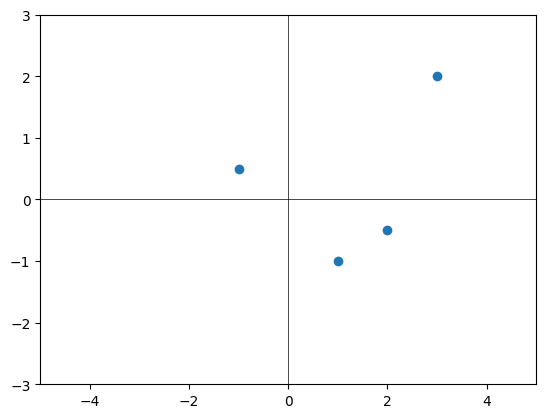

In [128]:
import matplotlib.pyplot as plt #importing graph to plot points
x = [-1, 1, 2, 3] #x values of coordinates
y = [1/2, -1, -1/2, 2] #cooresponding y values of coordinates
plt.axhline(0, color='black',linewidth=0.5) #creating the axis
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-5, 5) #setting bounds on the graph
plt.ylim(-3, 3)
plt.scatter(x, y)#plotting points as a scatterplot


In order to begin approximating the line of best fit, we must transform the datapoints into vectors a1 a2 and a3 to solve for the coefficients in the characteristic equation:

y = b1$x^2$ + b2x + b3c

(1/2) = b1($-1^2$) + (-1)x +b3

(-1)  = b1($1^2$) + (1)x +b3

(-1/2)  = b1($2^2$) + (2)x +b3

(2)  = b1($3^2$) + (3)x +b3

In [129]:
#example of Least Squares Problem
#first step is to perform QR decomposition on matrix A
a1 = np.array([1,1,4,9]) #represents all numbers multiplied by the b1 coefficient
a2 = np.array([-1,1,2,3])#represents all numbers multiplied by the b2 coefficient
a3 = np.array([1,1,1,1])#represents all numbers multiplied by the b3 coefficient
a4 = np.array([1/2,-1,-1/2,2]) #represnents y values
M = np.matrix([a1,a2,a3])
M = M.T
print("matrix of vector space (A):")
print(M)

orth_Basis = gram(a1,a2,a3)
print("Orthogonal Basis Matrix (Q):")
print(orth_Basis)
Q_T = orth_Basis.T #represents the transposition of matrix Q
R = Q_T * M #finding triangular matrix
R[np.abs(R) < 1e-15] = 0 #sets any numbers under 10^(-15) to zero
print("Trianglar Matrix (R):")
print(R)

matrix of vector space (A):
[[ 1 -1  1]
 [ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]]
Orthogonal Basis Matrix (Q):
[[ 0.10050378 -0.83521931  0.53218116]
 [ 0.10050378  0.39891072  0.70957488]
 [ 0.40201513  0.36151284  0.35478744]
 [ 0.90453403 -0.11219364 -0.2956562 ]]
Trianglar Matrix (R):
[[ 9.94987437  3.51763235  1.50755672]
 [ 0.          1.62057478 -0.1869894 ]
 [ 0.          0.          1.30088727]]


The solution for the least squared problem reads:

$A^T$Ax = $A^T$b

This can be simplified into:

x = $(A^TA)^{-1}$$A^T$b

Substituting A = QR into the equation will result in the simplification:

x = $R^{-1}$$Q^T$b



In [130]:

def leastSquares(Q,R,b): #takes inputs of matrixes Q, R, and b
  R_inv = np.linalg.inv(R) #finds the inverse of R
  Q_T = Q.T #finds the transpose of Q
  return((R_inv*Q_T)*b) #calculates least squares

a4 = np.matrix(a4)
a4 = a4.T
LS = leastSquares(orth_Basis,R,a4)
print("least squares solution:")
print(LS)


least squares solution:
[[ 0.60227273]
 [-0.86136364]
 [-0.93181818]]


The first value of the array coorelates to the coefficient b1, the second b2, and the third b3. We can test the line of best fit given by these values.

y = [[0.60227273]]x^2 + [[-0.86136364]]x + [[-0.93181818]]


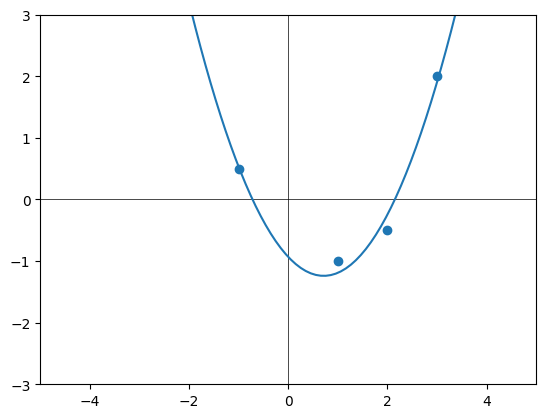

In [131]:
b1 = LS[0]
b2 = LS[1]
b3 = LS[2]
print("y = " + str(b1) + "x^2 + " + str(b2) + "x + " + str(b3)) #printing equation of approximation
x = [-1, 1, 2, 3] #x values of coordinates
y = [1/2, -1, -1/2, 2] #cooresponding y values of coordinates
xline = np.linspace(-5,5,100) #generating 100 random x values between x = -5 and x = 5
yline = (b1 * pow(xline,2)) +(b2 * xline) + b3 #generating 100 y values based on the equation of best fit line
yline = np.ravel(yline) #changes yline so it is a flattened array
plt.axhline(0, color='black',linewidth=0.5) #creating the axis
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-5, 5) #setting bounds on the graph
plt.ylim(-3, 3)
plt.scatter(x, y)#plotting points as a scatterplot
plt.plot(xline,yline)

It appears that the least squares method produced an accurate approximation of the line of best fit for the graph.